# Notable Observations: What makes them notable?

 According to the eBird API documentation, notable observations can be for locally or nationally rare species or are otherwise unusual, e.g. over-wintering birds in a species which is normally only a summer visitor.

# Issues to work:

1. DAVID - Notable birds in region - try Texas or Austin (Houston!!) -- pick a few wildlife refuges / on the coast / national seashore / etc

#### Citation: eBird Basic Dataset. Version: EBD_relAug-2020. Cornell Lab of Ornithology, Ithaca, New York. Aug 2020.

In [1]:
# import dependencies
import os, csv, requests, json, datetime  # might not need os
import pandas as pd
import plotly.express as px
from config import api_key, mapbox_token, g_key
from datetime import date

%reload_ext lab_black

px.set_mapbox_access_token(mapbox_token)

today = date.today()
back_short = 4
back_long = 30

In [46]:
# Obtain list of Texas cities and codes

regionType = "subnational2"
parentRegionCode = "US-TX"
state = "Texas"

url = (
    "https://api.ebird.org/v2/ref/region/list/"
    + regionType
    + "/"
    + parentRegionCode
    + ".json"
)

r = requests.get(url, params={"key": api_key})

In [47]:
r.url

'https://api.ebird.org/v2/ref/region/list/subnational2/US-TX.json?key=d56mdhi9b35r'

In [132]:
df_city_codes = pd.DataFrame(r.json())
df_city_codes.loc[df_city_codes["name"] == "Austin"]

code    name
7  US-TX-015  Austin

In [49]:
cities = df_city_codes[
    "code"
].to_list()  # save cities to a list to be able to iterate over later

In [10]:
# Observations in Texas

regionCode = "US-TX"

url_notables = (
    "https://api.ebird.org/v2/data/obs/"
    + regionCode
    + "/recent/notable?back=30"  # max number of days back for observations = 30
)

r_notables = requests.get(
    url_notables, params={"key": api_key, "back": back_long, "detail": "full"}
)

In [11]:
r_notables.status_code

200

In [12]:
r_notables.url

'https://api.ebird.org/v2/data/obs/US-TX/recent/notable?back=30&key=d56mdhi9b35r&back=30&detail=full'

### Notes: 
* Rename df columns for readability
* Add a "City" column to improve upon "locName"

In [144]:
df_notables = pd.DataFrame(r_notables.json())
df_notables

speciesCode                     comName               sciName      locId  \
0         renpha        Red-necked Phalarope    Phalaropus lobatus    L391467   
1        dowwoo1  Downy Woodpecker (Eastern)   Dryobates pubescens   L1894099   
2         swtkit         Swallow-tailed Kite  Elanoides forficatus  L12391538   
3         swtkit         Swallow-tailed Kite  Elanoides forficatus  L12391538   
4         swtkit         Swallow-tailed Kite  Elanoides forficatus  L12391538   
...          ...                         ...                   ...        ...   
3726     norhar2            Northern Harrier      Circus hudsonius    L989665   
3727     wilsni1              Wilson's Snipe    Gallinago delicata    L989665   
3728      cedwax               Cedar Waxwing   Bombycilla cedrorum    L295973   
3729      chispa            Chipping Sparrow    Spizella passerina    L295973   
3730     royter1                  Royal Tern    Thalasseus maximus  L12184505   

                                                locName             obsDt  \
0                                  Dallas Southside WTP  2020-09-29 10:42   
1              Shadow Creek Ranch Nature Park, Pearland  2020-09-29 10:22   
2     4431–5351 Montgomery Rd, Richmond US-TX 29.629...  2020-09-29 10:06   
3     4431–5351 Montgomery Rd, Richmond US-TX 29.629...  2020-09-29 10:06   
4     4431–5351 Montgomery Rd, Richmond US-TX 29.629...  2020-09-29 10:06   
...                                                 ...               ...   
3726          Wolf Springs Rd (incl. Blue Sky Sod Farm)  2020-08-30 14:25   
3727          Wolf Springs Rd (incl. Blue Sky Sod Farm)  2020-08-30 14:25   
3728                  Thompson Park, Amarillo (PHP 045)  2020-08-30 14:21   
3729                  Thompson Park, Amarillo (PHP 045)  2020-08-30 14:21   
3730       P4-746, Lake Bryan US-TX 30.70985, -96.46824  2020-08-30 13:17   

      howMany        lat         lng  obsValid  ...    countryName  \
0         1.0  32.645699  -96.639175     False  ...  United States   
1         1.0  29.581218  -95.417074     False  ...  United States   
2         1.0  29.629475  -95.882363     False  ...  United States   
3         1.0  29.629475  -95.882363     False  ...  United States   
4         1.0  29.629475  -95.882363     False  ...  United States   
...       ...        ...         ...       ...  ...            ...   
3726      1.0  32.559040  -96.587076      True  ...  United States   
3727      2.0  32.559040  -96.587076      True  ...  United States   
3728      3.0  35.238251 -101.833048      True  ...  United States   
3729      7.0  35.238251 -101.833048      True  ...  United States   
3730      1.0  30.709851  -96.468239      True  ...  United States   

       userDisplayName         obsId checklistId presenceNoted hasComments  \
0        Edward Wetzel  OBS988473364     CL27322         False       False   
1     David Sarkozi cc  OBS988465447     CL22320         False       False   
2       Suzanne Mottin  OBS988436910     CL22324         False       False   
3       Suzanne Mottin  OBS988436910     CL22324         False       False   
4       Suzanne Mottin  OBS988436910     CL22324         False       False   
...                ...           ...         ...           ...         ...   
3726        TIM GOLLOB  OBS974418917     CL27322         False       False   
3727        TIM GOLLOB  OBS974418916     CL27322         False       False   
3728      Hannah Tripp  OBS977372264     CL23458         False       False   
3729      Hannah Tripp  OBS977372260     CL23458         False       False   
3730   Nicholas Kurtin  OBS974303906     CL22990         False       False   

     firstName    lastName hasRichMedia evidence  
0       Edward      Wetzel        False      NaN  
1        David  Sarkozi cc        False      NaN  
2      Suzanne      Mottin         True        P  
3      Suzanne      Mottin         True        P  
4      Suzanne      Mottin         True        P  
...        ...         

In [145]:
pd.to_datetime(df_notables["obsDt"])
df_notables["Year"] = pd.DatetimeIndex(df_notables["obsDt"]).year
df_notables["Month"] = pd.DatetimeIndex(df_notables["obsDt"]).month
df_notables["Day"] = pd.DatetimeIndex(df_notables["obsDt"]).day

In [146]:
df_notables.columns

Index(['speciesCode', 'comName', 'sciName', 'locId', 'locName', 'obsDt',
       'howMany', 'lat', 'lng', 'obsValid', 'obsReviewed', 'locationPrivate',
       'subId', 'subnational2Code', 'subnational2Name', 'subnational1Code',
       'subnational1Name', 'countryCode', 'countryName', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence', 'Year', 'Month', 'Day'],
      dtype='object')

In [151]:
df_notables = df_notables.rename(
    columns={
        "speciesCode": "Species_Code",
        "comName": "Common_Name",
        "sciName": "Scientific_Name",
        "howMany": "Bird_Count",
        "subnational2Name": "City_Name",
        "subnational1Code": "State_Code",
        "subnational1Name": "State_Name",
        "countryCode": "Country_Code",
        "countryName": "Country_Name",
    }
)

In [172]:
df_notables["Bird_Count"].fillna(value=1, inplace=True)

df_notables.to_csv("NotableObs_eBird.csv", index=False)

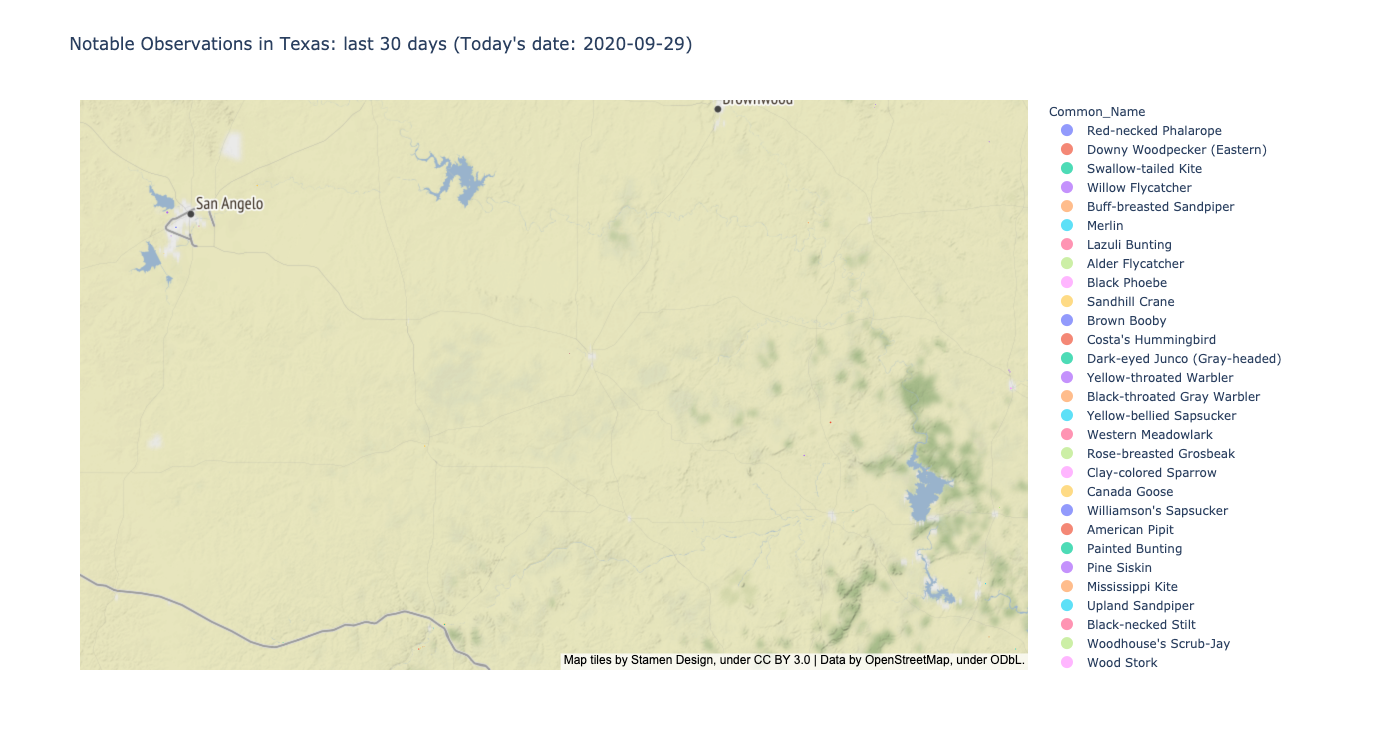

In [189]:
# mapbox_style options:
#     'open-street-map'`,
#     `'white-bg'`, `'carto-positron'`, `'carto-darkmatter'`, `'stamen-
#     terrain'`, `'stamen-toner'`, `'stamen-watercolor'`. Allowed values
#     which do require a Mapbox API token are `'basic'`, `'streets'`,
#     `'outdoors'`, `'light'`, `'dark'`, `'satellite'`, `'satellite-
#     streets'`

fig_df_notables = px.scatter_mapbox(
    df_notables,
    lat="lat",
    lon="lng",
    color="Common_Name",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Bird_Count", "obsDt"],
    title=f"Notable Observations in {state}: last {back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    height=750,
)
fig_df_notables.show()

In [167]:
df_notables.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'obsDt', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'subnational2Code', 'City_Name',
       'State_Code', 'State_Name', 'Country_Code', 'Country_Name',
       'userDisplayName', 'obsId', 'checklistId', 'presenceNoted',
       'hasComments', 'firstName', 'lastName', 'hasRichMedia', 'evidence',
       'Year', 'Month', 'Day'],
      dtype='object')

In [170]:
name_count = df_notables["Common_Name"].value_counts()
name_count.to_frame()

Common_Name
Calliope Hummingbird                       154
Sabine's Gull                              107
Red-necked Phalarope                       100
Rufous Hummingbird                          95
Anna's Hummingbird                          81
...                                        ...
Northern Shoveler                            1
Brown-headed Nuthatch (Southeast)            1
Ferruginous Duck                             1
Ringed Kingfisher                            1
Gray Vireo                                   1

[323 rows x 1 columns]

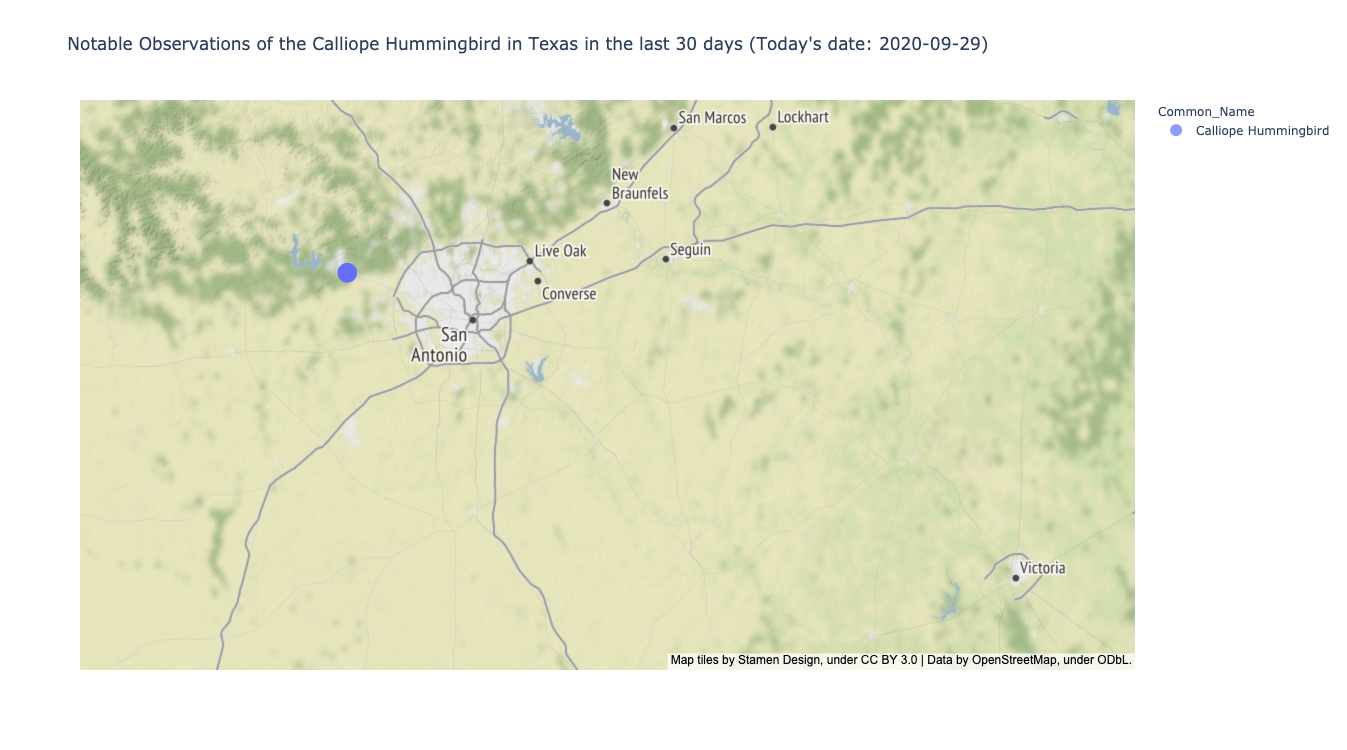

In [168]:
# Maps with plotly
species = "Calliope Hummingbird"

species_plot = df_notables.loc[df_notables["Common_Name"] == f"{species}"]

fig_species_plot = px.scatter_mapbox(
    species_plot,
    lat="lat",
    lon="lng",
    color="Common_Name",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Bird_Count", "obsDt"],
    title=f"Notable Observations of the {species} in {state} in the last {back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    height=750,
)
fig_species_plot.show()

In [185]:
# Get data for all notable observations across the US

regionCodeUS = "US"

url_notables_US = (
    f"https://api.ebird.org/v2/data/obs/" + regionCodeUS + "/recent/notable?"
)

r_notables_US = requests.get(
    url_notables_US, params={"key": api_key, "back": back_long, "detail": "full"}
)

In [186]:
r_notables_US.status_code

200

In [176]:
df_notables_US = pd.DataFrame(r_notables_US.json())
df_notables_US.columns

Index(['speciesCode', 'comName', 'sciName', 'locId', 'locName', 'obsDt',
       'howMany', 'lat', 'lng', 'obsValid', 'obsReviewed', 'locationPrivate',
       'subId', 'subnational2Code', 'subnational2Name', 'subnational1Code',
       'subnational1Name', 'countryCode', 'countryName', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence'],
      dtype='object')

In [187]:
df_notables_US["howMany"].fillna(value=1, inplace=True)

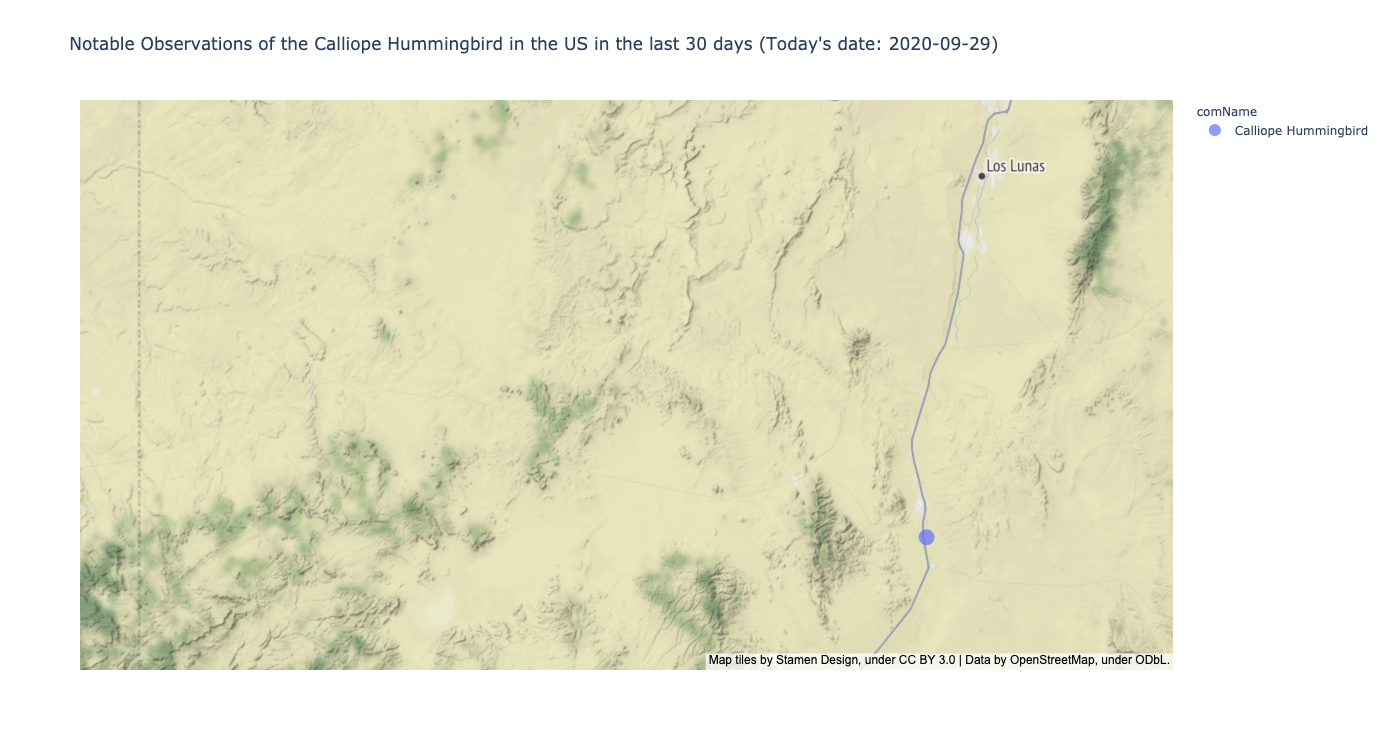

In [188]:
# fig_US = px.scatter_mapbox(
#     df_notables_US,
#     lat="lat",
#     lon="lng",
#     color="comName",
#     hover_data=["howMany", "obsDt", "subId"],
#     title=f"Notable Observations in the US - past {back} days (Today's date: {today})",
# )
# fig_US.show()

species = "Calliope Hummingbird"

species_plot = df_notables_US.loc[df_notables_US["comName"] == f"{species}"]

# Covering US for full 30 days and especially for a single species won't work because you're limited to 10k records. Could be missing a large portion of data.

fig_df_notables_US = px.scatter_mapbox(
    species_plot,
    lat="lat",
    lon="lng",
    color="comName",
    size="howMany",
    hover_name="comName",
    hover_data=["howMany", "obsDt"],
    title=f"Notable Observations of the {species} in the US in the last {back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    height=750,
)
fig_df_notables_US.show()

In [178]:
state_code = df_notables_US["subnational1Code"]

state_codes = pd.DataFrame({"State_Code": state_code})
state_codes

State_Code
0         US-NJ
1         US-MI
2         US-MI
3         US-RI
4         US-RI
...         ...
9995      US-NM
9996      US-NM
9997      US-NM
9998      US-FL
9999      US-DC

[10000 rows x 1 columns]

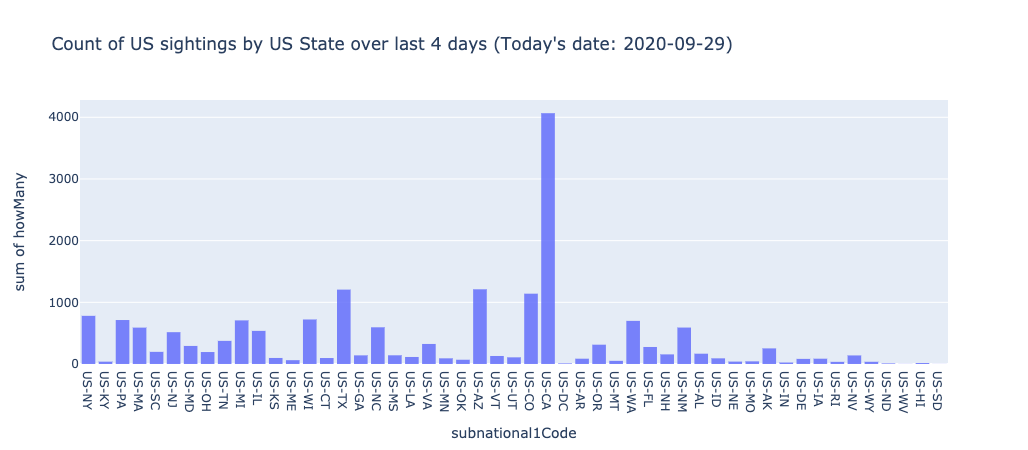

In [80]:
# loc_state = df_notables_US["subnational1Code"].unique()
# obs_count = df_notables_US["subnational1Code"].value_counts()

px.histogram(
    df_notables_US,
    x="subnational1Code",
    y="howMany",
    title=f"Count of US sightings by US State over last {back} days (Today's date: {today})",
    labels={"y": "Obs Count"},
    opacity=0.85,
    hover_name="subnational1Code",
)

# Animated Map

In [81]:
df_notables_US = df_notables_US.dropna().reset_index(drop=True)

In [82]:
pd.to_datetime(df_notables_US["obsDt"])
df_notables_US["Year"] = pd.DatetimeIndex(df_notables_US["obsDt"]).year
df_notables_US["Month"] = pd.DatetimeIndex(df_notables_US["obsDt"]).month
df_notables_US["Day"] = pd.DatetimeIndex(df_notables_US["obsDt"]).day

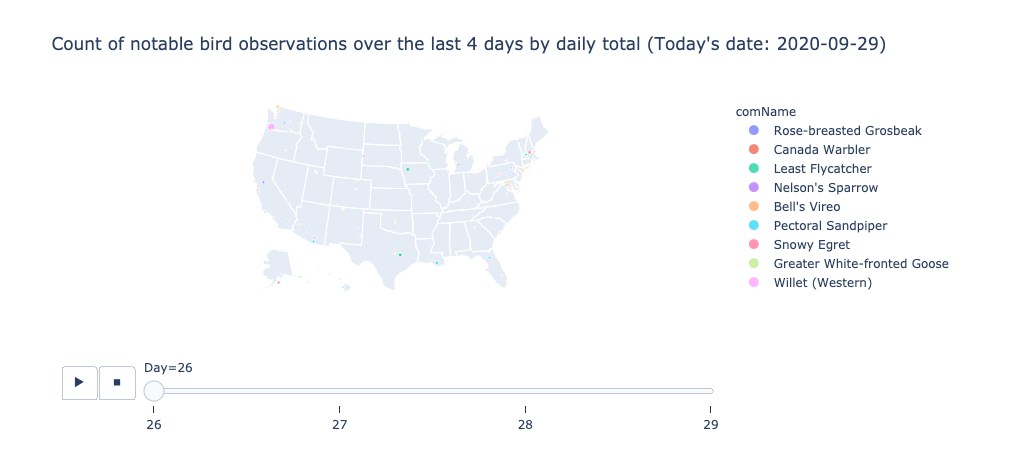

In [83]:
# Animate observations over time (4 days. Going back more than 4 days exceeds the allowable limit on number of records to request at a time for the API).
# Was going to iteratively add counts by days but maybe don't want to show the accumulation? May just want to show the total by day?
# Have two maps: one with accumulated observations over the 4 days, one with counts per day.
# With this map, you can identify an observation of interest, then research the bird type to find out why the observation is "notable".

animate_plot_df = df_notables_US.sort_values(by=["Day"], ignore_index=True)

fig_animate = px.scatter_geo(
    animate_plot_df,
    color="comName",
    lat="lat",
    lon="lng",
    hover_name="sciName",
    size="howMany",
    animation_frame="Day",
    projection="albers usa",
    title=f"Count of notable bird observations over the last {back} days by daily total (Today's date: {today})",
)

fig_animate.show()

# lat="lat", lon="lng",
# locations="US_State",
# locationmode="USA-states",

In [187]:
animate_plot_df.head(1)

speciesCode                   comName       sciName    locId        locName  \
0      lbbgul  Lesser Black-backed Gull  Larus fuscus  L142267  Heron Lake SP   

              obsDt  howMany        lat         lng  obsValid  ...  \
0  2020-09-26 10:02      2.0  36.679584 -106.686699      True  ...   

   checklistId  presenceNoted hasComments firstName  lastName hasRichMedia  \
0      CL23230          False       False     Wyatt  Egelhoff         True   

  evidence  Year Month Day  
0        P  2020     9  26  

[1 rows x 31 columns]

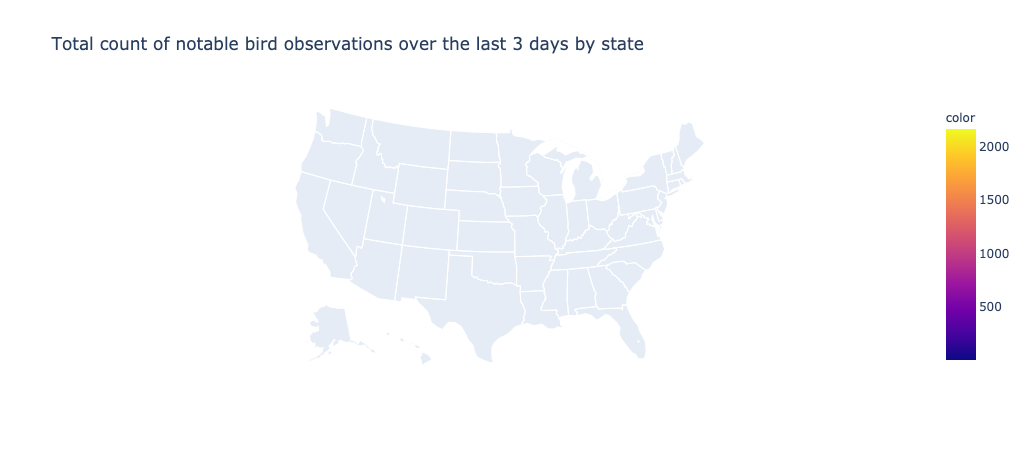

In [127]:
fig_bubble = px.scatter_geo(
    df_notables_US,
    color=obs_count,
    locations=loc_state,
    hover_name=obs_count,
    size=obs_count,
    projection="albers usa",
    title=f"Total count of notable bird observations over the last {back} days by state (Today's date: {today})",
)
fig_bubble.show()

## Notes:
### Data cleaning: 
#### * Renamed columns --Drop some unneeded columns?
#### * From obsDt column, created new columns Year, Month, Day, and US_State.
#### * Filtered out rows with NA data. Was it only one row with NA for "howMany"? If so, maybe do .fillna() with a value of "1" since the observation wouldn't have been recorded if there were 0 birds. Also, most observations are of 1 bird, right?

### Multiple Data Sources:
#### * eBird
#### * Google API - used reverse geocoding to get state from lat/long. --still working on this (9/28/20)--

# TEST AREA

In [36]:
# latlong = "40.714224,-73.961452"
# url_googleapi = (
#     f"https://maps.googleapis.com/maps/api/geocode/json?latlng={lat_lng_str}&key={g_key}"
# )

# r_states = requests.get(url_googleapi)

# states = r_states.json()
# states["results"][0]["address_components"][5]["short_name"]

# state = states["results"][0]["address_components"][5]["short_name"]
# state

In [25]:
# url_googleapi = (f"https://maps.googleapis.com/maps/api/geocode/json?latlng={lat_lng_str}&key={g_key}")

state_abbr = [
    "AL",
    "AK",
    "AZ",
    "AR",
    "CA",
    "CO",
    "CT",
    "DC",
    "DE",
    "FL",
    "GA",
    "HI",
    "ID",
    "IL",
    "IN",
    "IA",
    "KS",
    "KY",
    "LA",
    "ME",
    "MD",
    "MA",
    "MI",
    "MN",
    "MS",
    "MO",
    "MT",
    "NE",
    "NV",
    "NH",
    "NJ",
    "NM",
    "NY",
    "NC",
    "ND",
    "OH",
    "OK",
    "OR",
    "PA",
    "RI",
    "SC",
    "SD",
    "TN",
    "TX",
    "UT",
    "VT",
    "VA",
    "WA",
    "WV",
    "WI",
    "WY",
]

for i in df_notables.index:

    lat = df_notables.loc[i, "lat"]
    lng = df_notables.loc[i, "lng"]

    lat_lng_str = str(lat) + "," + str(lng)

    try:
        r_states = requests.get(
            f"https://maps.googleapis.com/maps/api/geocode/json?latlng={lat_lng_str}&key={g_key}"
        )

        states = r_states.json()
        state = states["results"][0]["address_components"][4]["short_name"]

        df_notables.loc[i, "US_State"] = state
    except:
        pass

In [135]:
states["results"][0]["address_components"][4]["short_name"]

'TX'

In [136]:
states["results"][0]["address_components"]

[{'long_name': '1104', 'short_name': '1104', 'types': ['street_number']},
 {'long_name': 'Scarlet Court',
  'short_name': 'Scarlet Ct',
  'types': ['route']},
 {'long_name': 'Colleyville',
  'short_name': 'Colleyville',
  'types': ['locality', 'political']},
 {'long_name': 'Tarrant County',
  'short_name': 'Tarrant County',
  'types': ['administrative_area_level_2', 'political']},
 {'long_name': 'Texas',
  'short_name': 'TX',
  'types': ['administrative_area_level_1', 'political']},
 {'long_name': 'United States',
  'short_name': 'US',
  'types': ['country', 'political']},
 {'long_name': '76034', 'short_name': '76034', 'types': ['postal_code']},
 {'long_name': '4107', 'short_name': '4107', 'types': ['postal_code_suffix']}]

In [137]:
df_notables.loc[df_notables["US_State"] == "Bell County"]

speciesCode           comName           sciName     locId  \
96      coukin  Couch's Kingbird  Tyrannus couchii  L4904145   

                          locName             obsDt  howMany        lat  \
96  Belton--Harris Community Park  2020-09-26 15:55      1.0  31.060991   

          lng  obsValid  obsReviewed  locationPrivate      subId     US_State  
96 -97.465424      True         True            False  S74098380  Bell County

In [138]:
r_check = requests.get(
    f"https://maps.googleapis.com/maps/api/geocode/json?latlng=31.060991,-97.465424&key={g_key}"
)
check = r_check.json()

In [139]:
check["results"][0]["address_components"][4]

{'long_name': 'Bell County',
 'short_name': 'Bell County',
 'types': ['administrative_area_level_2', 'political']}

In [142]:
# getting a list of sub-region codes (subnational1 for US is a list of states, subnational2 for US-TX is a list of cities)
regionType = "subnational1"
parentRegionCode = "US-TX"

url_state_codes = (
    "https://api.ebird.org/v2/ref/region/list/"
    + regionType
    + "/"
    + parentRegionCode
    + ".json"
)

r_state_codes = requests.get(url_state_codes, params={"key": api_key})

df_state_codes = pd.DataFrame(r.json())
df_state_codes

code      name
0    US-TX-001  Anderson
1    US-TX-003   Andrews
2    US-TX-005  Angelina
3    US-TX-007   Aransas
4    US-TX-009    Archer
..         ...       ...
249  US-TX-499      Wood
250  US-TX-501    Yoakum
251  US-TX-503     Young
252  US-TX-505    Zapata
253  US-TX-507    Zavala

[254 rows x 2 columns]

In [43]:
# for i in df_notables_US.index:

#     lat = df_notables_US.loc[i, "lat"]
#     lng = df_notables_US.loc[i, "lng"]

#     lat_lng_str = str(lat) + "," + str(lng)

#     try:
#         r = requests.get(
#             "https://maps.googleapis.com/maps/api/place/nearbysearch/json",
#             params={
#                 "location": lat_lng_str,
#                 "radius": 5000,
#                 "type": "lodging",
#                 "key": g_key,
#             },
#         )
#         hotel_df.loc[i, "Hotel_Name"] = r.json()["results"][0]["name"]
#     except:
#         pass

In [ ]:
student_df = pd.read_csv(students_csv)

city_table = pd.DataFrame(city_data)
city_table.to_csv("data/city_weather_data.csv", index=False)

In [ ]:
# ## Import up sound alert dependencies
# from IPython.display import Audio, display

# def allDone():
#   display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
# ## Insert whatever audio file you want above
# allDone()